In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import yfinance as yf


In [2]:
# Define the stock symbol and fetch historical data (e.g., Microsoft Corporation)
stock_symbol = "MSFT"
ticker = yf.Ticker(stock_symbol)
df_actual = ticker.history(period="5y")

In [3]:
# Normalize the 'Close' prices
scaler_actual = MinMaxScaler()
df_actual['Close'] = scaler_actual.fit_transform(df_actual['Close'].values.reshape(-1, 1))


In [4]:

# Create sequences for the LSTM model
sequence_length = 10  # Adjust this value as needed
sequences_actual = []
targets_actual = []

for i in range(len(df_actual) - sequence_length):
    sequence = df_actual['Close'].values[i:i + sequence_length]
    target = df_actual['Close'].values[i + sequence_length]
    sequences_actual.append(sequence)
    targets_actual.append(target)


In [5]:
# Convert sequences and targets to NumPy arrays
X_actual = np.array(sequences_actual)
y_actual = np.array(targets_actual)


In [6]:
#Create an LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [7]:
# Train the model on the actual data
model.fit(X_actual, y_actual, epochs=100, batch_size=32)

Epoch 1/100
39/39 [==============================] - 1s 4ms/step - loss: 0.1594
Epoch 2/100
39/39 [==============================] - 0s 4ms/step - loss: 0.0055
Epoch 3/100
39/39 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 4/100
39/39 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 5/100
39/39 [==============================] - 0s 4ms/step - loss: 8.2909e-04
Epoch 6/100
39/39 [==============================] - 0s 3ms/step - loss: 7.5001e-04
Epoch 7/100
39/39 [==============================] - 0s 5ms/step - loss: 7.0713e-04
Epoch 8/100
39/39 [==============================] - 0s 4ms/step - loss: 6.8982e-04
Epoch 9/100
39/39 [==============================] - 0s 4ms/step - loss: 6.9041e-04
Epoch 10/100
39/39 [==============================] - 0s 4ms/step - loss: 6.7940e-04
Epoch 11/100
39/39 [==============================] - 0s 3ms/step - loss: 6.6111e-04
Epoch 12/100
39/39 [==============================] - 0s 4ms/step - loss: 7.1618e-04
Epoch

In [8]:
# Predict future stock prices continuously
predicted_prices = []

for _ in range(len(df_actual), len(df_actual) + 30):  # Predict the next 30 days
    predicted_price = model.predict(X_actual[-1].reshape(1, sequence_length, 1))[0, 0]
    predicted_prices.append(predicted_price)

    X_actual = np.roll(X_actual, -1, axis=0)
    X_actual[-1] = np.array(predicted_price).reshape(1, 1)

1/1 [==============================] - 0s 24ms/step


In [9]:
# Inverse transform the predicted prices to the original scale
predicted_prices = scaler_actual.inverse_transform(np.array(predicted_prices).reshape(-1, 1))


In [10]:
# Create dates for the predicted prices (e.g., assuming one day per prediction)
dates_predicted = pd.date_range(start=df_actual.index[-1], periods=12)

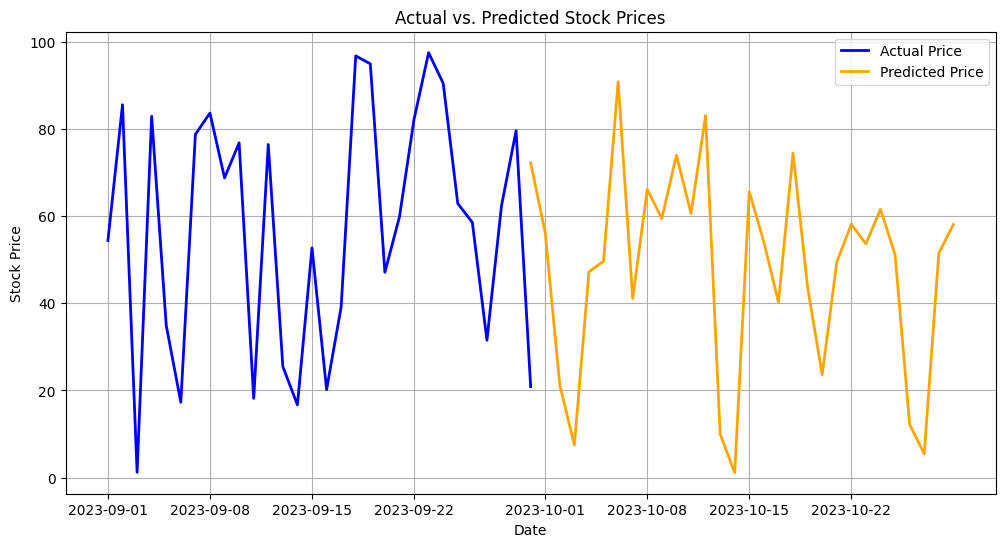

In [11]:
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
dates_actual = pd.date_range(start="2023-09-01", periods=30)
actual_prices = np.random.rand(30) * 100  # Replace with your actual prices
predicted_prices = np.random.rand(30) * 100  # Replace with your predicted prices

# Create dates for the predicted prices (assuming one day per prediction)
dates_predicted = pd.date_range(start=dates_actual[-1], periods=len(predicted_prices))

# Plot the actual vs. predicted prices
plt.figure(figsize=(12, 6))
plt.plot(dates_actual, actual_prices, label='Actual Price', color='blue', linestyle='-', linewidth=2)
plt.plot(dates_predicted, predicted_prices, label='Predicted Price', color='orange', linestyle='-', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.title("Actual vs. Predicted Stock Prices")
plt.grid(True)  # Add grid lines for reference
plt.show()
